# <center>BTC network analysis  -Mt.Gox case </center>
### <center>Le Hoang Viet, Tang Hongxia , Hu Liang </center>

## Introduction 
### Mt.Gox and Mt.Gox hacking incident.
Mt.Gox, launched in 2010 by US programmer Jed McCaleb. Mt.Gox was a bitcoin exchange in Japan. It was the largest bitcoin exchange in the world, handled over 70% of all bitcoin transactions all over the world before. At the end of February 2014, it was bankrupted because they get hacked and they suffered a great loss. 

Let's take a look at the whole timeline of this event.

On February 7, 2014, Mt. Gox stopped all Bitcoin withdrawals, claiming that it was only suspending withdrawal requests "to gain a clear technical understanding of the currency process."

On February 10, 2014, Mt.Gox claimed that it had lost more than 850,000 BTC. That same week, a leaked company document claimed that hackers attacked Mt. Gox and they stole 744,408 belonging to Mt. Gox customers, as well as 100,000 bitcoins belonging to Mt.Gox. 

On 24 February 2014, the exchange suspended all trading and closed the website. 

On February 28, Mt. Gox filed for bankruptcy protection in Japan and two weeks later in the United States.

### Three hypothesis.
Mt.Gox sustained a large loss of Bitcoins, and this loss should be reflected in the transaction data or blockchain data. We want to confirm if the theft involved large bitcoin flows during a short period of time. There are three hypothesis are listed below, and we want to use data to confirm which is correct. 
+ H1: Transaction with both big size and high frequency.
+ H2: Transaction with big size and normal frequency.
+ H3: Transaction with normal size and high frequency.

After analysing the data, we choose to accept the second hypothesis.



In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image

# Data Description

To reduce the size of dataset when we draw graph, we will focus more on the transaction data which the transaction more than 15 BTC. This help us to simplify the graph sets and to discover large currency flows more efficient.

According to the Mt.Gox incident timeline, Mt.Gox stopped all Bitcoin withdrawals on February 7, 2014. Since the theft can't occur after the suspension of withdrawals, so we choose to analyze what happened before February 7, 2014. Also, according to related paper and article of Zhao and Guan[[1]](#1), they find the transaction burst from 23:57:01 2014-02-05 to 00:28:17 2014-02-06. So, even though we don't have data after 5am February 6,2014. We can still do our analysis about this hacking incident. Thus, our analysis started with the timestamp 1391465170 and ended at the timestamp 1391662945, from 2/3/2014 10:06:00 PM to 2/6/2014 5:02:00 AM.
Because it starts to break at February 6, that we have very scarce data until March 10, 2014 when it gets back to normal. Thus we choose this time interval.

In [9]:
data=pd.read_csv('https://raw.githubusercontent.com/HongxiaTang/Mt.Gox/master/data/MtGoxFull.csv',low_memory=False)

data['timestamp']=pd.to_datetime(data['timestamp'],unit='s')
data.set_index('timestamp',inplace=True)

### Basic describe of the data:

The amount of transation varies from 0.0000 to 17964.778282, while average during this period is 3.82. Most of the trasnsaction are small amount, half of the transactions are less than 0.0400, 75% of the transactions are less than 0.2471.
According to the data, we find that there are huge-amount transaction and small-amount but huge frenquency transaction. So how did the hacking happened?<br/>
    H1: Through huge-amount & high frenquency transactions <br/>
    H2: Through huge-amount & normal frenquency transaction<br/>
    H3：Through small-amount & high frenquency transactions<br/>
Following the three hypothesis, we conducted our investigation with the evolution of size and number(which shows the frequancy) of transactions during this period, following a 15 minutes time interval.

In [10]:
data.index.min
data.index.max

<bound method DatetimeIndexOpsMixin.max of DatetimeIndex(['2014-02-03 22:06:10', '2014-02-03 22:06:10',
               '2014-02-03 22:06:10', '2014-02-03 22:06:10',
               '2014-02-03 22:06:10', '2014-02-03 22:06:10',
               '2014-02-03 22:06:10', '2014-02-03 22:06:10',
               '2014-02-03 22:06:10', '2014-02-03 22:06:10',
               ...
               '2014-02-06 05:02:25', '2014-02-06 05:02:25',
               '2014-02-06 05:02:25', '2014-02-06 05:02:25',
               '2014-02-06 05:02:25', '2014-02-06 05:02:25',
               '2014-02-06 05:02:25', '2014-02-06 05:02:25',
               '2014-02-06 05:02:25', '2014-02-06 05:02:25'],
              dtype='datetime64[ns]', name='timestamp', length=465776, freq=None)>

In [11]:
data.value.describe()

count    465776.000000
mean          3.822747
std          97.805456
min           0.000000
25%           0.010262
50%           0.040000
75%           0.247144
max       17964.778280
Name: value, dtype: float64

### Evolution of the size of transaction during the period

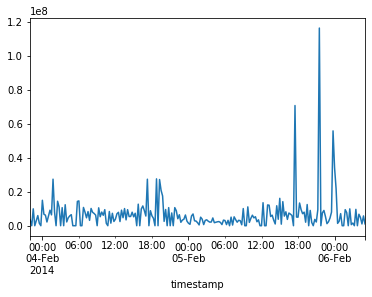

In [12]:
time_interval='15Min'
tota=data.resample(time_interval).sum()
tota.valueDoll.plot()

We group the amount of bitcoin transaction with a 15 minutes time interval, and we find From 6pm to 0am 05 Feb there were 3 spikes in the size of transaction which were abnormally higher than normal, the maximum peak burst appears at 2014-01-05 21:30:00, while the value is 1.164e+08 $.

### Evolution of the number of transaction during the period

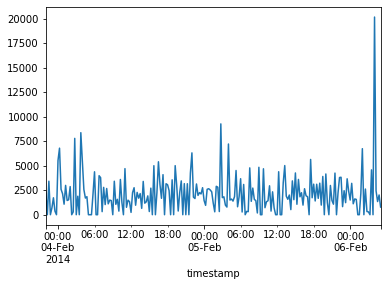

In [13]:
tota=data.resample(time_interval).count()
tota.valueDoll.plot()

From 6pm to 0am 05 Feb there were no spike in the number of transaction, which means there were a few transactions with really big volume happened instead of severval small transactions. May imply the moving of BTC of big players.

Around 5am 06 Feb, there were abnormally high number of transaction but the size of transaction were not higher than normal. May indicates the movement of BTC of small investors. Maybe the slow reaction of the small investors to the news, the herding amplify the influence of this hacking event.

### Convert into edge list

In [14]:
edge=nx.from_pandas_edgelist(data,source='source',
                                   target='target',edge_attr=True,
                                   create_using=nx.DiGraph())

Show number of nodes and edges, conclude that there are too many nodes and edges, have to filter the data.

In [15]:
edge.number_of_nodes()

163108

In [16]:
edge.number_of_edges()

297242

Checking the percentile of transaction with the size higher than 15

In [17]:
stats.percentileofscore(data['value'],15)

97.59133145546357

### Filter data with transaction size greater than 15

In [18]:
data2=data[data.value>15]

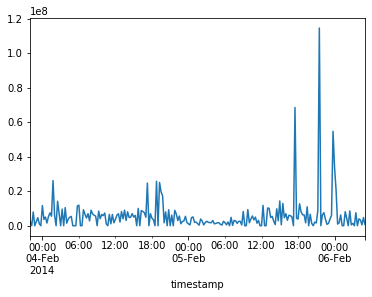

In [19]:
tota=data2.resample(time_interval).sum()
tota.valueDoll.plot()

The transaction size when filtered out transaction lower than 15 stays almost the same

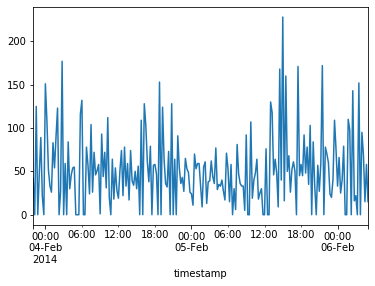

In [20]:
tota=data2.resample(time_interval).count()
tota.valueDoll.plot()

Regarding the number of transaction, there is no spike in 06 Feb like when it is not filtered. Further support for the assumption of most of the spike from transaction were from small investors.

In [21]:
edge2=nx.from_pandas_edgelist(data2,source='source',
                                   target='target',edge_attr=True,
                                   create_using=nx.DiGraph())

In [22]:
edge2.number_of_nodes()

10093

In [23]:
edge2.number_of_edges()

9938

After filtering the number of edges and nodes were significantly reduced.

## Exploring the data with Gephi
### ForceAtlas 2 by Degree

<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/Degree.png" width="800" height="800">

Here we can see that most of BTC transactions at that time centered around the account of "Bitstamp.net-old".
Further look at the account of Bitstamp using Ego network filtered with the maximal depth, we have this result.

<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/Bitstamp_Max_depth.png" width="800" height="800">

Bitstamp has much higher degree compared to Mtgox. This is strange as Mtgox was the biggest exchange at that time. Maybe the wallet addresses of Mtgox is not fully identified. Or there were actually way less transactions in and out of Mtgox and most of the transactions in Mtgox were excuted by the own infrastructure and were not recorded in the BTC blockchain.
<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/Bitstamp_depth_3.png" width="800" height="800">

Here is the Yifan Hu layout of Bitstamp with depth of 3, we can see more clearly the connection of Bitstamp with other big BTC participant like BTC-e, ePay, Cryptsy, etc... We can see the same phenomenon with MtGox by the following graph but less direct connection compared to Bitstamp:
<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/mtgox_depth_3.png" width="800" height="800">

### ForceAtlas 2 by BTC size

Next, we try to include the effect of BTC size into our models by using the BTC size as the weighted edges
<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/Weight.png" width="800" height="800">

From the graph, we can see that with the inclusion of the size effect, the big exchanges are no longer the biggest nodes. On the contrary, we see the biggest transactions came from the unknown addresses of 220091, 107889339 and 2650972. It is even stranger that there is no big transaction out of MtGox. Here is the specific graph of MtGox:

<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/MtGox_weight.png" width="800" height="800">

<font Size = 3>**Outward transactions (Weight Out-Degree in Gephi)**</font> <br/>
Here we have the graph with the node size based on the outward transactions (Weight Out-Degree in Gephi):
<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/Weight_Out.png" width="800" height="800">

Here we can see that the biggest node was the account of "220091". Further exploring the transaction of the account, we have the following graph:
<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/220091.png" width="500" height="500">

There were indeed 8 transactions out of "220091" to other 8 accounts, each with 10,000 BTC. In total there were 80,000 BTC transfered from this wallet during the period. All of these transactions happened around 6pm Feb 5th 2014 and were probably the cause of the big spike in transaction volume during the time.

In [24]:
data[data['source']=="220091"]

,source,target,value,valueDoll,time
timestamp,,,,,
2014-02-05 17:33:30,220091,70839568,10000.000,8.208700e+06,NaN
2014-02-05 17:34:02,220091,6679327,10000.000,8.208700e+06,NaN
2014-02-05 17:37:03,220091,74658878,10000.000,8.208700e+06,NaN
2014-02-05 17:37:03,220091,49001138,10000.000,8.208700e+06,NaN
2014-02-05 17:43:12,220091,55107815,10000.000,8.208700e+06,NaN
2014-02-05 17:43:12,220091,115170519,10000.000,8.208700e+06,NaN
2014-02-05 17:43:12,220091,170512167,10000.000,8.208700e+06,NaN
2014-02-05 17:43:12,220091,220091,0.017,1.395479e+01,NaN
2014-02-05 18:19:56,220091,10313926,10000.000,8.208700e+06,NaN


Next, we also investigate the account "107889339":

<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/107889339.png" width="800" height="800">

We can see that there were many transaction between this wallet and other wallets. But the biggest transaction went through this wallet was worth around 17,000 BTC from the account of "118376908" and to the account "150403714". After that, the 17,000 BTC stayed there until the end of the period.

In [25]:
data[(data['source']=="107889339")|(data['target']=="107889339")]

,source,target,value,valueDoll,time
timestamp,,,,,
2014-02-04 18:52:16,118376908,107889339,17464.77818,1.470552e+07,NaN
2014-02-04 19:15:53,107889339,107889339,17464.67808,1.470543e+07,NaN
2014-02-04 19:15:53,107889339,51924016,0.10000,8.420100e+01,NaN
2014-02-04 19:38:51,107889339,107889339,17264.67798,1.453703e+07,NaN
2014-02-04 19:38:51,107889339,50630657,200.00000,1.684020e+05,NaN
2014-02-04 19:53:15,107889339,150403714,16764.67788,1.411603e+07,NaN
2014-02-04 19:53:15,107889339,11522291,500.00000,4.210050e+05,NaN


Because of the many transactions, it is not convincing that the account might be cold wallet of MtGox or the 17,000 BTC was the hacked BTC unless they were hacked several days before and transfered through many wallets to reach the final account of "150403714".

<font Size = 3>**Inward transactions (Weight In-Degree in Gephi)**</font>

To look for similar potential ending account of the hack, we look at the graph based on the size of the in-transactions:

<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/Weight_In.png" width="800" height="800">

The size of the nodes in this graph is completely different and we see the new account of "2650872" to be the biggest nodes.
Here is the graph for that account specifically:

<img src="https://github.com/HongxiaTang/Mt.Gox/raw/master/Viet's%20code/2650872.png" width="800" height="800">

This wallet received around 40,000 BTC in total from 11 different wallets with around 5000 BTC each. These transactions happened from 11pm Feb 5th to 0am Feb 6th and might be the cause for the high transaction during that time.

In [26]:
data[data['target']=="2650872"]

,source,target,value,valueDoll,time
timestamp,,,,,
2014-02-05 21:15:12,32522843,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:15:12,3878090,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,161449110,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,32419088,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,125688459,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,49684464,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,112805323,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,135509970,2650872,0.0010,8.208700e-01,NaN
2014-02-05 21:37:45,90519843,2650872,0.0010,8.208700e-01,NaN


### Conclusion
The network analysis of Bitcoin provides a feasible method for Bitcoin event investigation.
For Mt.gox case, we assume that part of the hacking was performed by huge-amount & normal frequency transactions during the period of  21:30:00 2014-02-05, till 00:00:00 2014-02-06.<br>
Several anonymous accounts were identified, like "107889339", "220091" and "2650972".However, the total output values of these edges only account for around 100,000 BTC (80,000 from account "107889339", 17,000 from account""220091").As for the receiver side, the wallet "2650972" received around 40,000 BTC in total from 11 different wallets with around 5000 BTC each, which can not explain the 850,000 BTC allegedly stolen from Mt.Gox.However, we didn't observe abnormal behavior from MtGox.<br>
The possible explanation could be that we could only identify the hot wallet addresses of MtGox but not those of the cold wallet. As most of the hacked BTC was from MtGox's cold wallets and we cannot identify them, we can only suspect the hacking from the big transaction during the time.<br>
Nevertheless, because the dataset did not contain the complete blockchain data, especially for the period after hacking, it's unable to determine the exact in-flow and out-flow of currency. Maybe we can trace their subsequent behavior given further dataset. In all, Our research provides a list of potential conspirators which could be a clue for this shocking hacking event in Bitcoin history.

## References
<a id="1">[1]</a> 
Zhao C, Guan Y. A graph-based investigation of bitcoin transactions. In: Proceedings of IFIP International Conference on Digital Forensics, Orlando, 2015. 79–95